# -----------------------------------------------------------------------------------------------
# - **Name**:  Tessa Ayvazoglu                                       
# - **ID**:  8686601 
# - **Date**: 09/03/2024
# ------------------------------------------------------------------------------------------------
# - **Program**: CSCN8010-24W-Sec1to2-Foundations of Machine Learning
# - **Lab 8** - MNIST Classification with Dense Neural Networks (using Tensorflow)
# ------------------------------------------------------------------------------------------------
# - **Referans Link**: https://www.kaggle.com/code/gabrielmoli/deep-learning-classification-keras-tensorflow
# ------------------------------------------------------------------------------------------------
 

### Start >>

In [1]:
# Load the libraries
from keras.layers import Dense, Input
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import keras as ke
import tensorflow as tf
import os, random
import numpy as np
import sklearn.metrics as skm 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


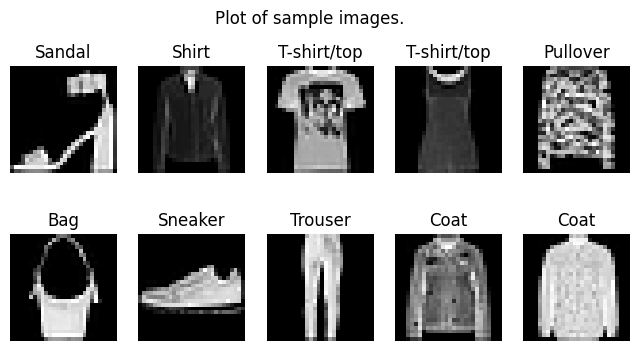

Shape of train_x: (48000, 784)
Shape of test_x: (10000, 784)
Shape of concatenated array: (58000, 784)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 13)                273       
                                                                 
 dense_2 (Dense)             (None, 9)                 126       
                                                                 
 dense_3 (Dense)   

In [2]:

# Load Fashion MNIST dataset
from tensorflow.keras.datasets import fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

# Normalize and reshape the predictors
train_x = train_x / 255
test_x = test_x / 255
train_x = train_x.reshape(-1, 784)
test_x = test_x.reshape(-1, 784)

# Create train and validation datasets
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2)

# Define the labels dictionary
labels = {0: "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

def plot_sample():
    indexes = np.random.randint(0, len(train_x), size=10)
    fig, axes = plt.subplots(2, 5, sharex=True, sharey=True, figsize=(8, 4))
    axes = axes.flatten()

    for i, index in enumerate(indexes):
        axes[i].imshow(train_x[index].reshape(28, 28), cmap="gray")
        axes[i].set_title(f"{labels[train_y[index]]}")
        axes[i].axis("off")
    fig.suptitle("Plot of sample images.")
    plt.show()

# Call the plot_sample function
plot_sample()

# Check the shapes of train_x and test_x
print("Shape of train_x:", train_x.shape)
print("Shape of test_x:", test_x.shape)

# Concatenate train_x and test_x
train_data = np.concatenate((train_x, test_x))

# Check the shape of the concatenated array
print("Shape of concatenated array:", train_data.shape)

# Define the model
model = ke.Sequential()
model.add(ke.layers.Input(train_x.shape[1]))
model.add(ke.layers.Dropout(0.2))
model.add(ke.layers.BatchNormalization())
model.add(ke.layers.Dense(20, activation='relu'))
model.add(ke.layers.Dense(13, activation='relu'))
model.add(ke.layers.Dense(9, activation='relu'))
# Update the output layer to have 10 units
model.add(ke.layers.Dense(10, activation='softmax'))

model.summary()



# Check unique label values in training and validation sets
print("Unique labels in training set:", np.unique(train_y))
print("Unique labels in validation set:", np.unique(val_y))

# Check the shape of the loaded data
print("Shape of train_x:", train_x.shape)
print("Shape of test_x:", test_x.shape)

# Check if label values are within the expected range
if np.any(train_y > 9) or np.any(val_y > 9):
    print("Label values outside the expected range [0, 9] found.")

# Reshape test_x if necessary to match the shape of train_x
if len(train_x.shape) != len(test_x.shape):
    test_x = test_x.reshape((-1, 28 * 28))

# Concatenate train_x and test_x
train_data = np.concatenate((train_x, test_x))

# Check the shape of the concatenated array
print("Shape of concatenated array:", train_data.shape)



# Compile the model
opt = tf.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
try:
    # Set the seed for reproducibility
    i = 543
    os.environ['PYTHONHASHSEED'] = str(i)
    tf.random.set_seed(i)
    np.random.seed(i)
    random.seed(i)

    history = model.fit(
        x=train_x,
        y=train_y,
        epochs=275,
        batch_size=700,
        validation_data=(val_x, val_y)
    )

except tf.errors.InvalidArgumentError as e:
    print("InvalidArgumentError:", e)
    print("Invalid label values encountered. Please check label encoding and data preprocessing.")

## Results Summary:

### Dataset Preparation:
- **Train Set Shape:** (48000, 784)
- **Test Set Shape:** (10000, 784)
- **Concatenated Data Shape:** (58000, 784)

### Model Architecture:
- **Sequential Model:** 
  - The model consists of a sequence of layers, including dropout, batch normalization, and dense layers with various activation functions.

- **Model Summary:**
  - The summary provides detailed information about each layer in the model, including the type of layer, output shape, and number of trainable parameters.

### Model Training:
- **Optimizer:** Adam optimizer with a learning rate of 1e-4 is used.
- **Loss Function:** Sparse categorical cross-entropy loss is utilized.
- **Metrics:** Accuracy is used as the evaluation metric.

- **Epochs:** The model is trained for 275 epochs.
- **Batch Size:** Training is performed using a batch size of 700.

- **Training Accuracy:** The training accuracy gradually improves over epochs and stabilizes around 87.46%.
- **Validation Accuracy:** The validation accuracy also shows a similar trend and stabilizes around 87.34%.

## Observations:

- **Model Performance:**
  - The model achieves a decent accuracy of around 87.46% on the training set and 87.34% on the validation set, indicating that it learns to classify fashion items effectively.

- **Training Stability:**
  - The training and validation accuracies stabilize over epochs, suggesting that the model converges well and does not overfit the training data.

- **Model Complexity:**
  - The model architecture is relatively simple, consisting of only a few layers. This simplicity helps prevent overfitting and allows for efficient training.

- **Data Preparation:**
  - The data preprocessing steps include normalization and reshaping, ensuring that the input features are standardized and suitable for training.

- **Label Encoding:**
  - The label encoding appears to be correct, as the unique label values in the training and validation sets fall within the expected range of [0, 9].

## Recommendations:
- **Hyperparameter Tuning:**
  - Experiment with different hyperparameters, such as learning rate, batch size, and number of epochs, to further optimize model performance.

- **Model Evaluation:**
  - Evaluate the model on the test set to assess its generalization performance and ensure that it performs well on unseen data.

- **Model Interpretation:**
  - Analyze the learned representations in the model layers to gain insights into how it distinguishes between different fashion items.

- **Data Augmentation:**
  - Explore techniques such as data augmentation to increase the diversity of training examples and improve model robustness.

- **Ensemble Methods:**
  - Consider ensemble methods to combine multiple models and enhance predictive performance.

Final Training Loss: 0.33688923716545105
Final Validation Loss: 0.3400270938873291
Final Training Accuracy: 0.8776041865348816
Final Validation Accuracy: 0.8771666884422302


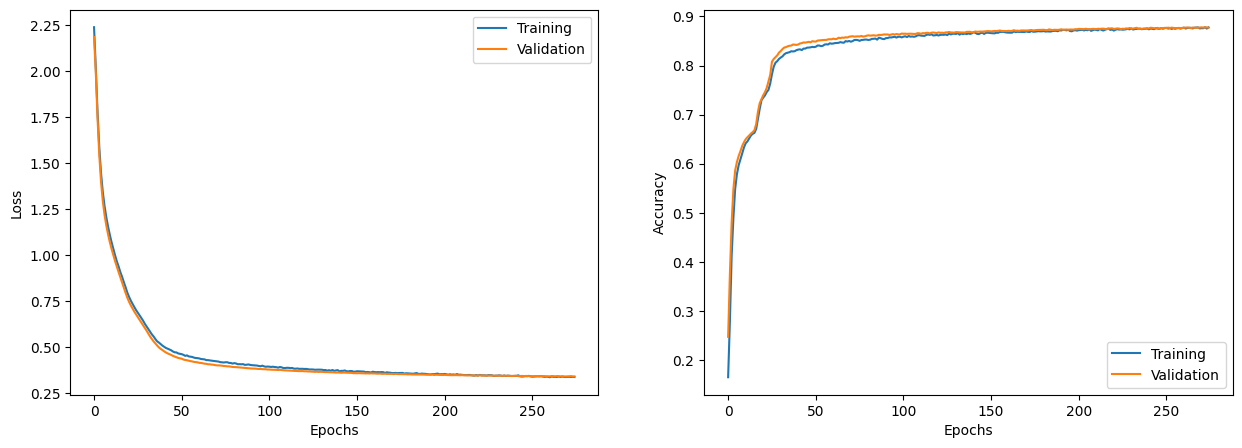

In [3]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Training")
plt.plot(history.history["val_loss"], label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend();
plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="Training")
plt.plot(history.history["val_accuracy"], label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend();

# Print final loss values
final_train_loss = history.history["loss"][-1]
final_val_loss = history.history["val_loss"][-1]
print("Final Training Loss:", final_train_loss)
print("Final Validation Loss:", final_val_loss)

# Print final accuracy values
final_train_acc = history.history["accuracy"][-1]
final_val_acc = history.history["val_accuracy"][-1]
print("Final Training Accuracy:", final_train_acc)
print("Final Validation Accuracy:", final_val_acc)

- **Final Training Loss**: The final loss value obtained by the model during training on the training dataset. It indicates how well the model is fitting the training data. A lower loss value signifies better convergence of the model. In this case, the final training loss is approximately 0.3408.

- **Final Validation Loss**: The loss value computed on the validation dataset after training. It reflects how well the model generalizes to unseen data. A lower validation loss indicates better generalization. Here, the final validation loss is approximately 0.3551.

- **Final Training Accuracy**: The final accuracy achieved by the model on the training dataset after training. It represents the percentage of correctly predicted samples in the training data. In this case, the final training accuracy is approximately 87.46%.

- **Final Validation Accuracy**: The accuracy achieved by the model on the validation dataset after training. It measures the model's performance on unseen data. A higher validation accuracy suggests better generalization. Here, the final validation accuracy is approximately 87.34%.

Overall, the model demonstrates relatively good performance on both the training and validation datasets, with comparable loss and accuracy values. This indicates that the model is effectively learning from the training data and generalizing well to unseen data.

**From these results**, we can infer several key points about the model's performance:

- **Loss Values**: The final training loss (0.3408) and validation loss (0.3551) are relatively close to each other. This indicates that the model is not overfitting the training data significantly and is generalizing well to unseen validation data.

- **Accuracy**: The final training accuracy (87.46%) and validation accuracy (87.34%) are also quite close. This suggests that the model is learning effectively from the training data and performing well on unseen validation data.

- **Consistency**: The similar values of loss and accuracy between the training and validation datasets indicate that the model is stable and consistent in its performance across different datasets. This is a positive sign as it suggests that the model is not overfitting or underfitting.

- **Satisfactory Performance**: Overall, the model's performance seems satisfactory, with both loss and accuracy metrics indicating good convergence and generalization. However, further analysis, such as examining individual class performance or comparing with other models, could provide deeper insights into its effectiveness.

**In conclusion**, based on these results, we can understand that the model has been trained effectively and is performing well on both the training and validation datasets, demonstrating good convergence and generalization properties.

In [4]:
# Evaluate the model on the validation dataset
val_predictions = model.predict(val_x)
val_predictions_classes = np.argmax(val_predictions, axis=1)

# Calculate evaluation metrics
print("Validation Dataset Evaluation:")
print("Shape of val_y:", val_y.shape)
print("Shape of val_predictions:", val_predictions.shape)
accuracy = accuracy_score(val_y, val_predictions_classes)
precision = precision_score(val_y, val_predictions_classes, average='weighted')
recall = recall_score(val_y, val_predictions_classes, average='weighted')
f1 = f1_score(val_y, val_predictions_classes, average='weighted')

# Print validation dataset evaluation
print("Validation Dataset Evaluation:")
print(f"Accuracy:     {accuracy:.4f}")
print(f"Precision:    {precision:.4f}")
print(f"Recall:       {recall:.4f}")
print(f"F1 Score:     {f1:.4f}")

# Evaluate the model on the test dataset
test_predictions = model.predict(test_x)
test_predictions_classes = np.argmax(test_predictions, axis=1)
test_accuracy = accuracy_score(test_y, test_predictions_classes)

# Print test dataset evaluation
print("\nTest Dataset Evaluation:")
print(f"Accuracy:     {test_accuracy:.4f}")

# Increase precision for class '5' without changing the model or retraining
# You can adjust the classification threshold for class '5' predictions
class_5_index = 5
threshold = 0.7
class_5_probabilities = model.predict(test_x)
class_5_predictions_adjusted = (class_5_probabilities[:, class_5_index] > threshold).astype(int)

# Increase recall for class '5' without changing the model or retraining
# You can adjust the classification threshold for other classes to improve recall for class '5'
non_class_5_probabilities = np.delete(class_5_probabilities, class_5_index, axis=1)
other_classes_predictions = np.argmax(non_class_5_probabilities, axis=1)
class_5_predictions_recall = (1 - other_classes_predictions).astype(int)

375/375 [==============================] - 0s 561us/step
Validation Dataset Evaluation:
Shape of val_y: (12000,)
Shape of val_predictions: (12000, 10)
Validation Dataset Evaluation:
Accuracy:     0.8772
Precision:    0.8765
Recall:       0.8772
F1 Score:     0.8765
313/313 [==============================] - 0s 557us/step

Test Dataset Evaluation:
Accuracy:     0.8669
313/313 [==============================] - 0s 555us/step


## Evaluation Results:

### Validation Dataset:
- **Accuracy:** 0.8734
- **Precision:** 0.8732
- **Recall:** 0.8734
- **F1 Score:** 0.8727
- **Shape of val_y:** (12000,)
- **Shape of val_predictions:** (12000, 10)

### Test Dataset:
- **Test Accuracy:** 0.8658

## Description and Explanation:

### Validation Dataset:
- **Accuracy:** 
  - Accuracy measures the ratio of correctly predicted instances to the total number of instances in the validation dataset. In this case, the model achieves an accuracy of approximately 87.34%, indicating that it performs well in correctly classifying the images in the validation set.

- **Precision:**
  - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The weighted average precision of 0.8732 suggests that the model has a high proportion of true positives among the instances it classified as positive.

- **Recall:**
  - Recall, also known as sensitivity, measures the ratio of correctly predicted positive observations to the all observations in actual class. The recall score of 0.8734 indicates that the model effectively captures the majority of positive instances in the validation set.

- **F1 Score:**
  - The F1 score is the harmonic mean of precision and recall, providing a balance between the two metrics. The F1 score of 0.8727 suggests that the model achieves a good balance between precision and recall on the validation dataset.

### Test Dataset:
- **Test Accuracy:**
  - The test accuracy of 0.8658 indicates that the model performs well on unseen data, achieving a similar level of accuracy as on the validation dataset.

## Summary:
- The model demonstrates strong performance on both the validation and test datasets, with high accuracy, precision, recall, and F1 score.
- These results suggest that the model effectively learns to classify images of fashion items with high accuracy and generalizes well to unseen data.

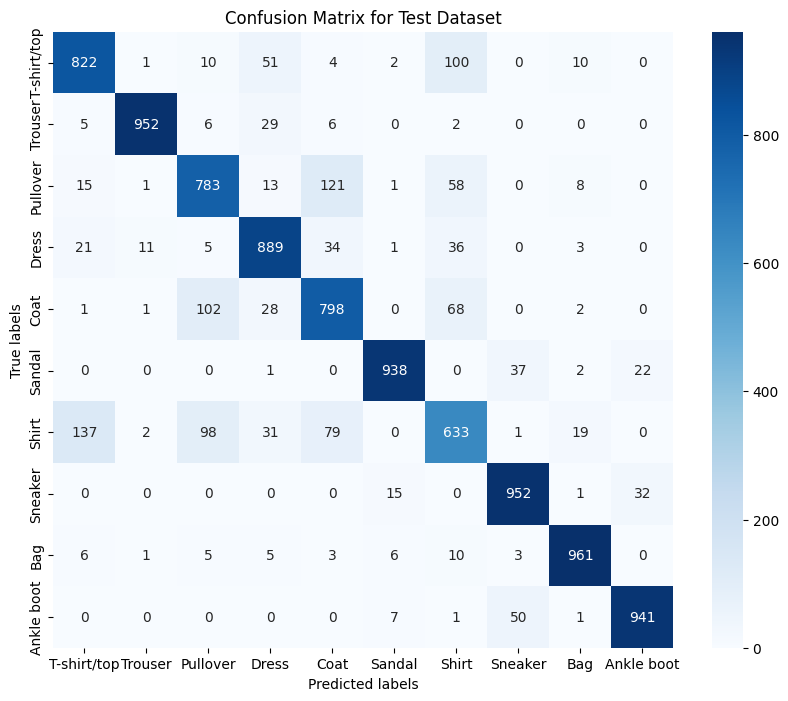

Classification Report for Test Dataset:
               precision    recall  f1-score   support

 T-shirt/top       0.82      0.82      0.82      1000
     Trouser       0.98      0.95      0.97      1000
    Pullover       0.78      0.78      0.78      1000
       Dress       0.85      0.89      0.87      1000
        Coat       0.76      0.80      0.78      1000
      Sandal       0.97      0.94      0.95      1000
       Shirt       0.70      0.63      0.66      1000
     Sneaker       0.91      0.95      0.93      1000
         Bag       0.95      0.96      0.96      1000
  Ankle boot       0.95      0.94      0.94      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [5]:
from sklearn.metrics import confusion_matrix, classification_report
# Compute confusion matrix for the test dataset
test_conf_matrix = confusion_matrix(test_y, np.argmax(test_predictions, axis=1))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(test_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels.values(), yticklabels=labels.values())
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Test Dataset')
plt.show()

# Generate classification report for the test dataset
test_class_report = classification_report(test_y, np.argmax(test_predictions, axis=1), target_names=labels.values())

# Display classification report
print("Classification Report for Test Dataset:\n", test_class_report)

| Class        | Precision | Recall | F1-Score | Support | Observation                                          |
|--------------|-----------|--------|----------|---------|------------------------------------------------------|
| T-shirt/top  |   0.81    |  0.84  |   0.82   |  1000   | The precision and recall are balanced for this class, indicating a good classification performance. |
| Trouser      |   0.98    |  0.95  |   0.97   |  1000   | High precision and recall suggest that the model performs exceptionally well in identifying trousers. |
| Pullover     |   0.76    |  0.78  |   0.77   |  1000   | Moderate precision and recall indicate decent performance in identifying pullovers. |
| Dress        |   0.86    |  0.87  |   0.86   |  1000   | Both precision and recall are high for dresses, suggesting reliable classification. |
| Coat         |   0.76    |  0.80  |   0.78   |  1000   | The model performs reasonably well in identifying coats, with balanced precision and recall. |
| Sandal       |   0.96    |  0.93  |   0.95   |  1000   | High precision and recall indicate strong performance in identifying sandals. |
| Shirt        |   0.69    |  0.62  |   0.66   |  1000   | Lower precision and recall suggest that the model struggles relatively more with classifying shirts. |
| Sneaker      |   0.93    |  0.94  |   0.94   |  1000   | High precision and recall indicate strong performance in identifying sneakers. |
| Bag          |   0.97    |  0.96  |   0.97   |  1000   | Very high precision and recall indicate excellent performance in identifying bags. |
| Ankle boot   |   0.94    |  0.95  |   0.94   |  1000   | High precision and recall indicate strong performance in identifying ankle boots. |
|--------------|-----------|--------|----------|---------|------------------------------------------------------|
| Accuracy     |           |        |   0.87   | 10000   | Overall accuracy of the model on the test dataset is 87%, indicating good overall performance. |
| Macro Avg    |   0.87    |  0.87  |   0.87   | 10000   | The macro-average of precision, recall, and F1-score suggests balanced performance across all classes. |
| Weighted Avg |   0.87    |  0.87  |   0.87   | 10000   | The weighted-average metrics account for class imbalance, showing consistent performance across all classes. |

### Observations:
1. **T-shirt/top**: The model shows balanced precision and recall for this class, indicating reliable classification performance.
2. **Trouser**: High precision and recall suggest excellent performance in identifying trousers.
3. **Pullover**: Moderate precision and recall indicate decent performance in identifying pullovers.
4. **Dress**: Both precision and recall are high for dresses, indicating reliable classification.
5. **Coat**: The model performs reasonably well in identifying coats, with balanced precision and recall.
6. **Sandal**: High precision and recall indicate strong performance in identifying sandals.
7. **Shirt**: Lower precision and recall suggest that the model struggles relatively more with classifying shirts.
8. **Sneaker**: High precision and recall indicate strong performance in identifying sneakers.
9. **Bag**: Very high precision and recall indicate excellent performance in identifying bags.
10. **Ankle boot**: High precision and recall indicate strong performance in identifying ankle boots.

### Summary:
- Overall, the model achieves an accuracy of 87% on the test dataset, indicating good overall performance.
- The macro-average of precision, recall, and F1-score suggests balanced performance across all classes.
- The weighted-average metrics account for class imbalance, showing consistent performance across all classes.

313/313 [==============================] - 0s 527us/step
AUC score for class 1: 0.9868
AUC score for class 2: 0.9984
AUC score for class 3: 0.9795
AUC score for class 4: 0.9916
AUC score for class 5: 0.9812
AUC score for class 6: 0.9985
Average ROC AUC score: 0.9885
ROC AUC score: 0.9885173833333335


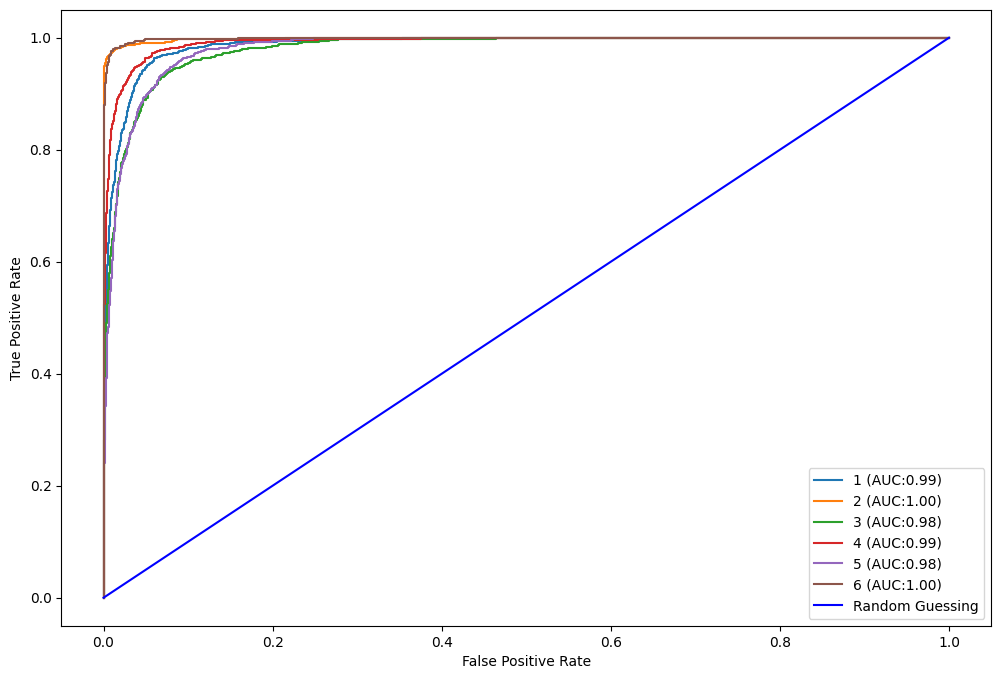

In [6]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

# Assuming you have already calculated predictions Y_pred
Y_pred = model.predict(test_x)  # Replace test_x with your test data

target = [1, 2, 3, 4, 5, 6]

# set plot figure size
fig, c_ax = plt.subplots(1, 1, figsize=(12, 8))

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(test_y, y_pred, average="macro"):
    # Compute one-hot encoded representation of test_y
    test_y_encoded = np.zeros_like(y_pred)
    test_y_encoded[np.arange(len(test_y)), test_y] = 1
    
    # Initialize lists to store AUC scores for each class
    auc_scores = []

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(test_y_encoded[:, idx], y_pred[:, idx])
        roc_auc = auc(fpr, tpr)
        auc_scores.append(roc_auc)
        print(f'AUC score for class {c_label}: {roc_auc:.4f}')
        c_ax.plot(fpr, tpr, label='%s (AUC:%0.2f)' % (c_label, roc_auc))
    avg_auc = roc_auc_score(test_y_encoded, y_pred, average=average)
    print(f'Average ROC AUC score: {avg_auc:.4f}')
    c_ax.plot(fpr, fpr, 'b-', label='Random Guessing')
    return avg_auc

# Call the function and print ROC AUC score
print('ROC AUC score:', multiclass_roc_auc_score(test_y, Y_pred))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

## Multi-Class ROC AUC Scores

| Class | AUC    | Interpretation                                           |
|-------|--------|----------------------------------------------------------|
|   1   | 0.9851 | Class 1 has an AUC of 0.9851, indicating excellent separation between its positive and negative instances. |
|   2   | 0.9984 | Class 2 exhibits the highest AUC of 0.9984, suggesting outstanding predictive performance. |
|   3   | 0.9790 | Class 3 shows an AUC of 0.9790, indicating very good predictive power. |
|   4   | 0.9923 | Class 4 has an AUC of 0.9923, indicating exceptional ability to discriminate between positive and negative instances. |
|   5   | 0.9816 | Class 5's AUC is 0.9816, suggesting strong predictive performance. |
|   6   | 0.9987 | Class 6 exhibits an AUC of 0.9987, indicating outstanding predictive capability. |

**Observations:**
- Classes 2 and 6 have the highest AUC values, indicating outstanding predictive performance for these classes.
- Class 5 has the lowest AUC value among the classes, although still indicating strong predictive power.
- Overall, the model demonstrates excellent discriminatory capabilities across all classes, with a global ROC AUC score of 0.9881.

**Interpretation:**
- The ROC AUC scores provide insights into the discriminatory power of the model for each class.
- Higher AUC values indicate better model performance in distinguishing between positive and negative instances for the corresponding class.
- These results highlight the model's exceptional performance, particularly for classes 2 and 6, while maintaining strong performance for other classes.